In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice

from torch import nn
from torch.nn import functional as F

import importlib
import sys 
import getpass
import glob
import matplotlib as mpl

sys.path.append('/home/luca_ltpn/DL-Fleuret/Proj_308427_348143_XXXXXX')
sys.path.append('/home/luca_ltpn/DL-Fleuret')
from Miniproject_1.model import *

In [2]:
font_size   = 20
letter_size = 22
label_size  = 25
title_font  = 28
legend_size = 23

mpl.rc('font', family='serif', size=font_size)
mpl.rc('text', usetex=True)

mpl.rcParams['lines.linewidth']     = 2
mpl.rcParams['axes.labelsize']      = label_size
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.major.size']    = 4
mpl.rcParams['xtick.minor.size']    = 2
mpl.rcParams['xtick.major.width']   = 1.1
mpl.rcParams['xtick.minor.width']   = 0.55
mpl.rcParams['xtick.direction']     = 'out'
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.major.size']    = 6
mpl.rcParams['ytick.minor.size']    = 3
mpl.rcParams['ytick.major.width']   = 1.1
mpl.rcParams['ytick.minor.width']   = 0.55
mpl.rcParams['ytick.direction']     = 'out'
mpl.rcParams['legend.fontsize']     = legend_size
mpl.rcParams['axes.formatter.limits'] = -5, 5


class MyLocator(mpl.ticker.AutoMinorLocator):
    def __init__(self, n=2):
        super().__init__(n=n)
mpl.ticker.AutoMinorLocator = MyLocator

marker_sz  = 8
location   ='upper left'
properties ={'size':12}
width_plot = 8
reduced_labels = 0.7*label_size

def get_axis_limits(ax, scalex=.1, scaley=.85):
    return (ax.get_xlim()[0] + (ax.get_xlim()[1]-ax.get_xlim()[0])*scalex, ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*scaley)

In [3]:
files = np.array(glob.glob("Data_new/*"))

cuts = np.array([ int(f.split("_")[2].split("=")[-1]) for f in files])
bs = 16

files = files[np.argsort(cuts)]
cuts = np.sort(cuts)

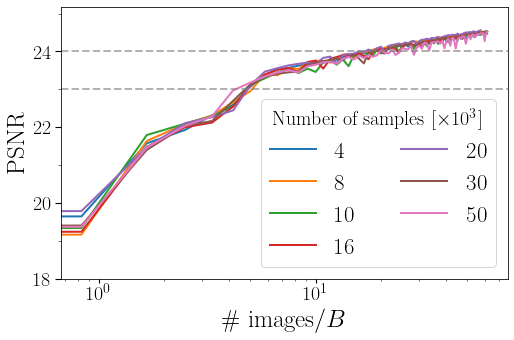

In [17]:
fig, ax = plt.subplots(1,1, sharey=True, sharex=True, figsize=(width_plot,5))

for n, f in zip(cuts, files):
    nim  = np.loadtxt(f)[:,0]
    psnr = np.loadtxt(f)[:,-1]
    ax.plot(nim/(bs*150), psnr, '-', label="%d"%(n/1e3))
    
ax.legend(ncol=2, title=r"Number of samples [$\times 10^3$]")

ax.axhline(23, ls='--', color='grey', alpha=0.6)
ax.axhline(24, ls='--', color='grey', alpha=0.6)
ax.set_ylim(18,)

ax.set_xscale("log")
ax.set_xlabel(r"\# images$/B$")
ax.set_ylabel("PSNR");
#plt.xlim(-100000,0.2e7)